In [1]:
import networkx as nx
import numpy as np
import scipy as sp
import pandas as pd

In [2]:
G0 = nx.read_weighted_edgelist("bakers_yeast.txt",comments="#",nodetype=str)

In [3]:
threshold_score = 950
for edge in G0.edges: 
    weight = list(G0.get_edge_data(edge[0],edge[1]).values())
    if(weight[0] <= threshold_score):
        G0.remove_edge(edge[0],edge[1])

In [4]:
df = pd.read_csv("essential_proteins.csv", header=None)
essential_proteins = df[1].values

for protein in essential_proteins:
  str = "4932." + protein
  if str in G0.nodes:
    G0.remove_node(str)

In [5]:
print(G0.number_of_nodes())
print(G0.number_of_edges())

5098
16750


SLC1 (YDL052C)

In [7]:
from networkx.algorithms.community import greedy_modularity_communities
communities = greedy_modularity_communities(G0)

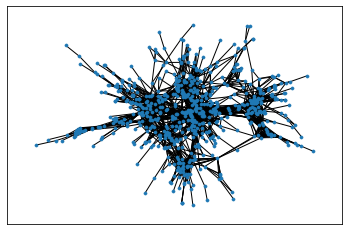

In [33]:
sub = G0.subgraph(list(communities[0]))
nx.draw_networkx(sub, node_size=10, with_labels=False, linewidths=0.5)

In [70]:
i = 0
for community in communities:
  if "4932.YLL012W" in community:
    break
  i += 1

for community in communities:
  print(len(community))
print(i)  

657
513
194
191
113
90
86
83
77
64
61
53
46
45
41
25
22
20
18
18
12
12
12
10
10
10
9
9
9
9
8
7
7
7
6
6
6
6
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1

Graph with 45 nodes and 144 edges


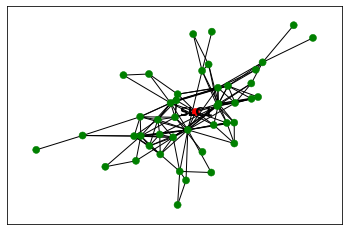

In [71]:
sub_slc1 = G0.subgraph(list(communities[i]))
print(sub_slc1)
color_map = ['red' if node == "4932.YDL052C" else 'green' for node in communities[i]]  
nx.draw_networkx(sub_slc1, node_size=50, with_labels=True, linewidths=0.5, labels = {"4932.YDL052C" : "SLC1"}, font_weight="bold", node_color = color_map)


Proteins

1. CPS1: homolog: CPA2(YJR109C)
2. AGPAT2: homolog: SCL1(YDL052C)
3. LAL: homolog: TGL1(YKL140W), YEH1(YLL012W)
4. FATP5: homolog: FAT1(YBR041W)
5. JNK1: homolog: HOG1(YLR113W)
6. GRP78/*HSPA5: homolog: KAR2(YJL034W)
7. CPS1: homolog: URA2(YJL130C)


In [72]:
homologs = ["4932.YJR109C", "4932.YDL052C", "4932.YKL140W", "4932.YLL012W", "4932.YBR041W", "4932.YLR113W", "4932.YJL130C"]
color_map = ['red' if node in homologs else 'green' for node in community for community in communities]  
nx.draw_networkx(G0, node_size=10, with_labels=False, linewidths=0.5, node_color=color_map)

KeyboardInterrupt: 

In [74]:
# Identifying what communities each homolog is in
indexes = []
for homolog in homologs:
  i = 0
  for community in communities:
    if homolog in community:
      indexes.append(i)
      break
    i += 1 

print(list(zip(homologs, indexes)))

[('4932.YJR109C', 0), ('4932.YDL052C', 13), ('4932.YKL140W', 13), ('4932.YLL012W', 13), ('4932.YBR041W', 0), ('4932.YLR113W', 4), ('4932.YJL130C', 0)]


Attempt at plotting network

In [75]:
from netgraph import Graph
import random

In [77]:
# Mapping random colours to each community
community_color_map = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(communities))]
print(community_color_map)
print(len(communities))

['#892A0C', '#A6AD45', '#BC1E40', '#219753', '#F48E40', '#7E8C23', '#EB45D5', '#171BE1', '#37EED8', '#354F82', '#AD59FF', '#6CDA3D', '#55FB77', '#928281', '#816956', '#13263E', '#D55E2E', '#BEFC3B', '#355B37', '#AFE67C', '#B083AC', '#67E84F', '#F56F08', '#FAA1B0', '#0A4A65', '#D94E02', '#160CB1', '#71D8F8', '#0F08AB', '#46CAE3', '#E614CD', '#56CFAD', '#614D82', '#E305FA', '#50F9CC', '#F1B58E', '#580A7E', '#56C60D', '#F2016A', '#046EDE', '#DC503E', '#685A47', '#BD168A', '#056F5A', '#F72C52', '#345705', '#33A9CD', '#B430F3', '#6C4488', '#BF65BE', '#EA0B18', '#D13FD8', '#173611', '#E17476', '#5E0F09', '#63FA78', '#E285FA', '#658E54', '#78F7C1', '#9DFCED', '#198549', '#2F61B4', '#6E38BB', '#95F554', '#175DCA', '#61306C', '#C7BFF9', '#6FF0BC', '#AE30FF', '#CD47E2', '#F89736', '#E8F635', '#9255CE', '#8D5094', '#9D9975', '#26824D', '#0135F2', '#951B6E', '#F16907', '#B1F93A', '#87D7F6', '#DCFF6A', '#E74763', '#43DAF3', '#79F898', '#E132F0', '#08BD1A', '#5EF559', '#7D2648', '#F63739', '#66A848'